<a href="https://colab.research.google.com/github/velish-qubadov/Deep-Learning/blob/main/From_Scratch_(ResNet34%2CGoogLeNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ResNet-34

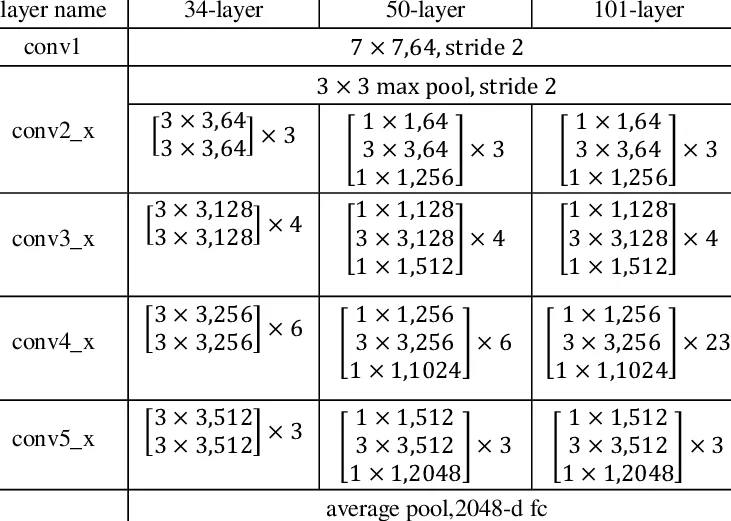

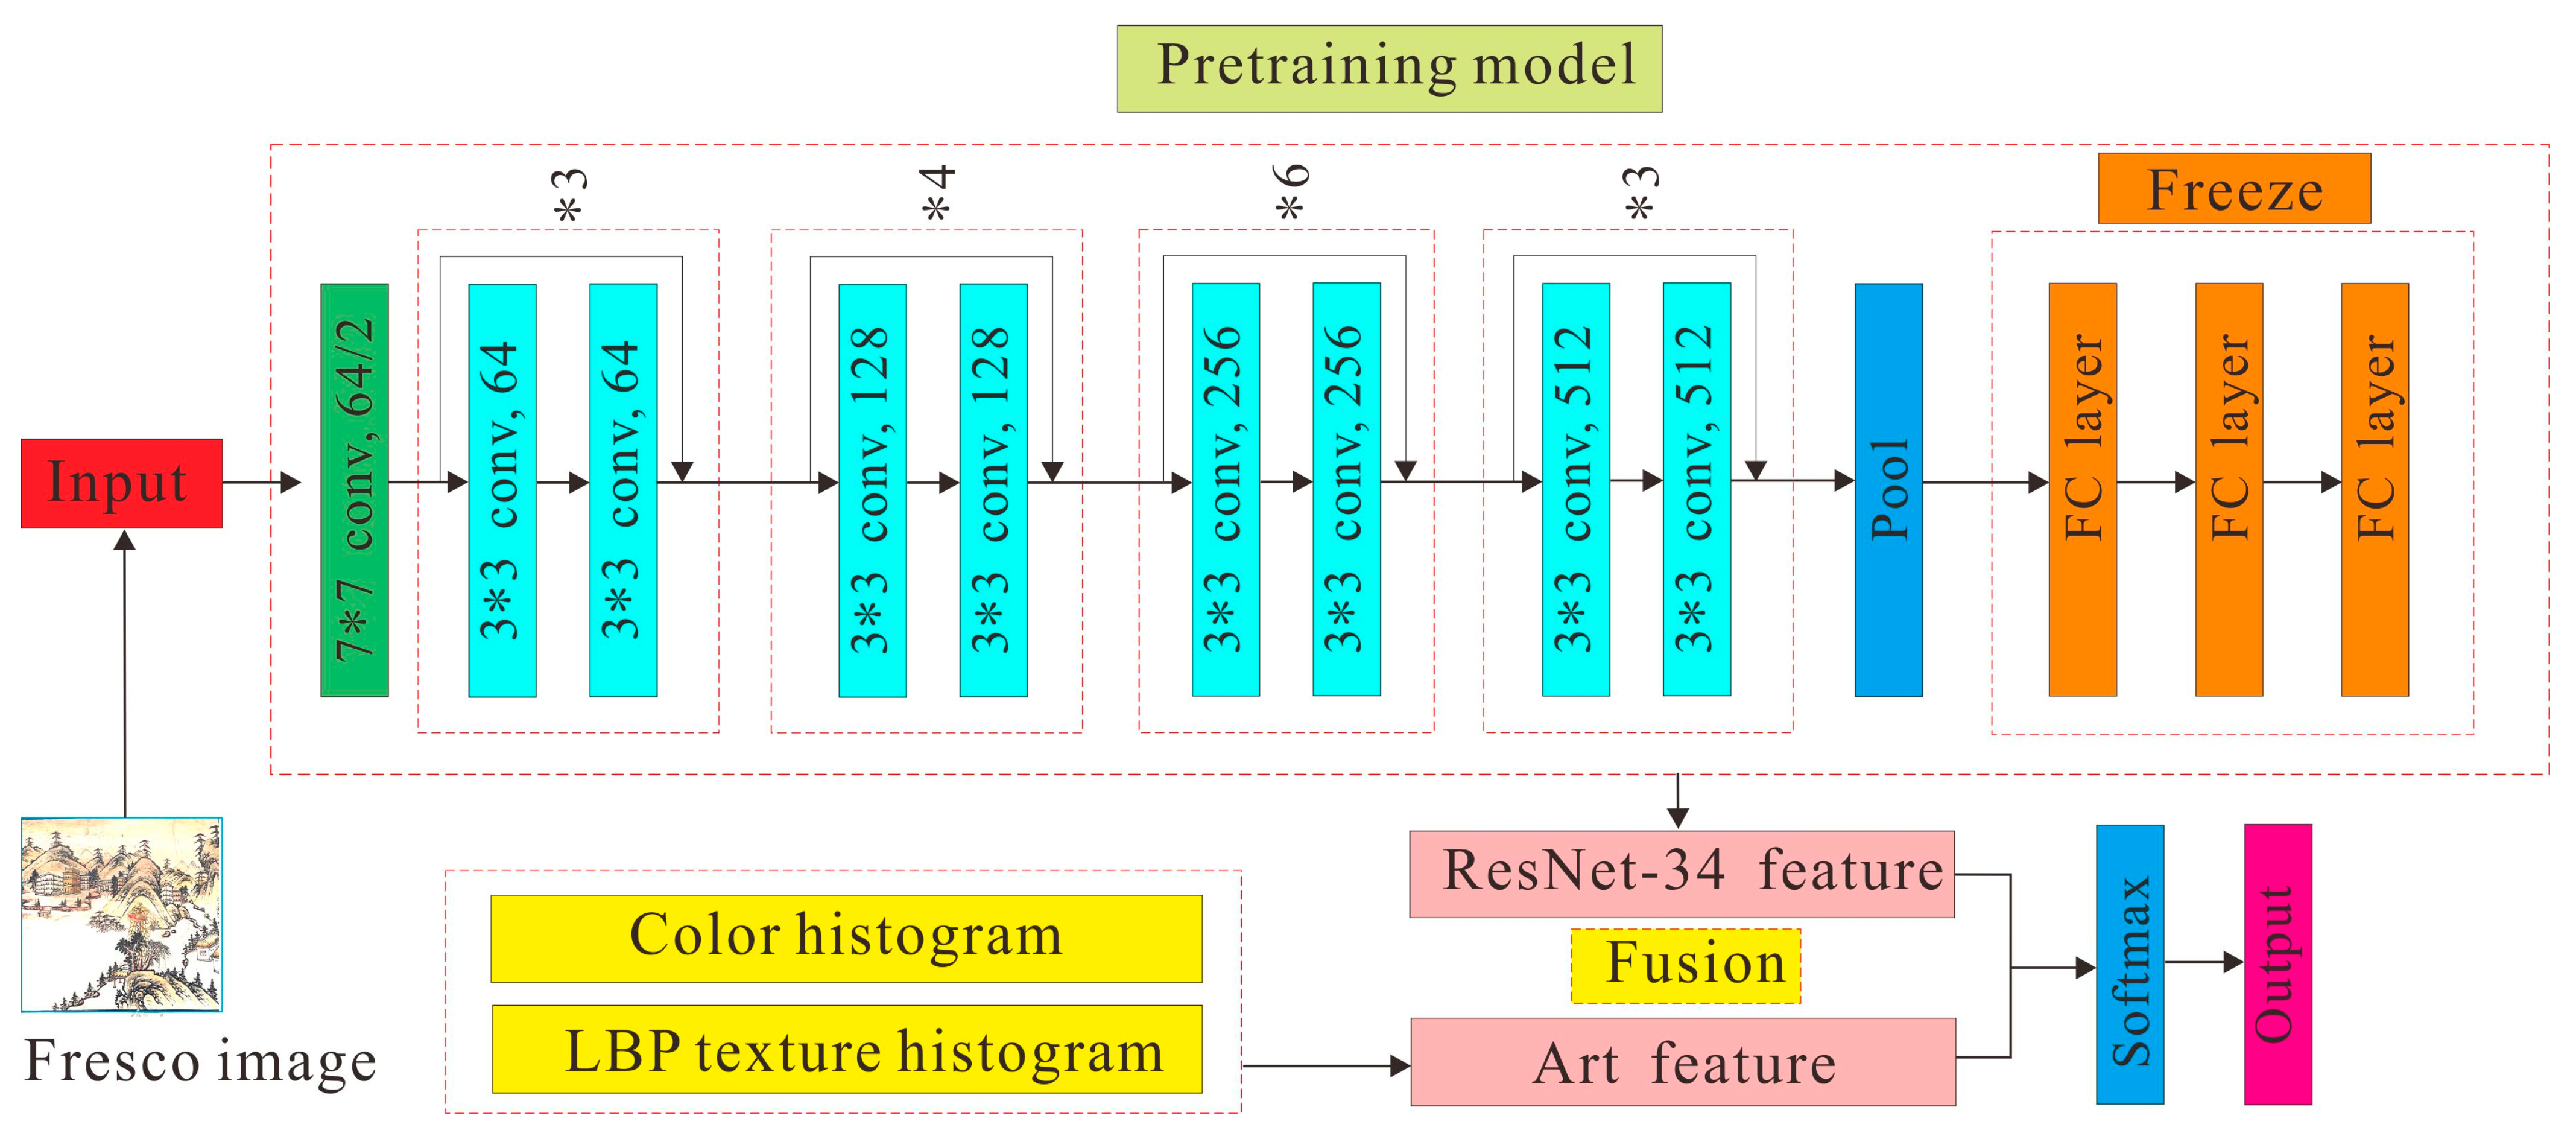

In [2]:
import tensorflow as tf

In [3]:
def identity_block(inputs, filters):
  skip_connection = inputs
  x = tf.keras.layers.Conv2D(filters=filters,
                             kernel_size=(3, 3),
                             kernel_initializer='he_normal',
                             use_bias=False,
                             padding='same')(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Conv2D(filters=filters,
                             kernel_size=(3, 3),
                             kernel_initializer='he_normal',
                             use_bias=False,
                             padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)
  added = tf.keras.layers.Add()([x, skip_connection])

  return added

In [4]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
conv1 = tf.keras.layers.Conv2D(64, (7, 7), strides=2, kernel_initializer='he_normal', activation='relu')(inputs)
maxpool = tf.keras.layers.MaxPooling2D((3, 3), strides=2)(conv1)
conv2_1 = identity_block(maxpool, 64)
conv2_2 = identity_block(conv2_1, 64)
conv2_3 = identity_block(conv2_2, 64)

conv2_3 = tf.keras.layers.Conv2D(128, (1, 1),  kernel_initializer='he_normal', activation='relu')(conv2_3)

conv3_1 = identity_block(conv2_3, 128)
conv3_2 = identity_block(conv3_1, 128)
conv3_3 = identity_block(conv3_2, 128)
conv3_4 = identity_block(conv3_3, 128)

conv3_4 = tf.keras.layers.Conv2D(256, (1, 1),  kernel_initializer='he_normal', activation='relu')(conv3_4)

conv4_1 = identity_block(conv3_4, 256)
conv4_2 = identity_block(conv4_1, 256)
conv4_3 = identity_block(conv4_2, 256)
conv4_4 = identity_block(conv4_3, 256)
conv4_5 = identity_block(conv4_4, 256)
conv4_6 = identity_block(conv4_5, 256)

conv4_6 = tf.keras.layers.Conv2D(512, (1, 1),  kernel_initializer='he_normal', activation='relu')(conv4_6)


conv5_1 = identity_block(conv4_6, 512)
conv5_2 = identity_block(conv5_1, 512)
conv5_3 = identity_block(conv5_2, 512)

avg = tf.keras.layers.GlobalAveragePooling2D()(conv5_3)
flat = tf.keras.layers.Flatten()(avg)
outputs = tf.keras.layers.Dense(10, 'softmax')(flat)

Resnet34 = tf.keras.Model(inputs, outputs)

In [6]:
Resnet34.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 109, 109,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 54, 54,    │     36,864 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 54, 54,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 54, 54,    │     36,864 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 54, 54,    │          0 │ conv2d_2[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 54, 54,    │          0 │ activation_1[0][… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │     36,864 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 54, 54,    │     36,864 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ conv2d_4[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 54, 54,    │          0 │ activation_3[0][… │
│                     │ 64)               │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 54, 54,    │     36,864 │ add_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        256 │ conv2d_5[0][0]  

 Total params: 22,837,130 (87.12 MB)

 Trainable params: 22,829,578 (87.09 MB)

 Non-trainable params: 7,552 (29.50 KB)

In [7]:
tf.keras.utils.plot_model(Resnet34, show_shapes=True)

#Inception v1 (GoogLeNet)

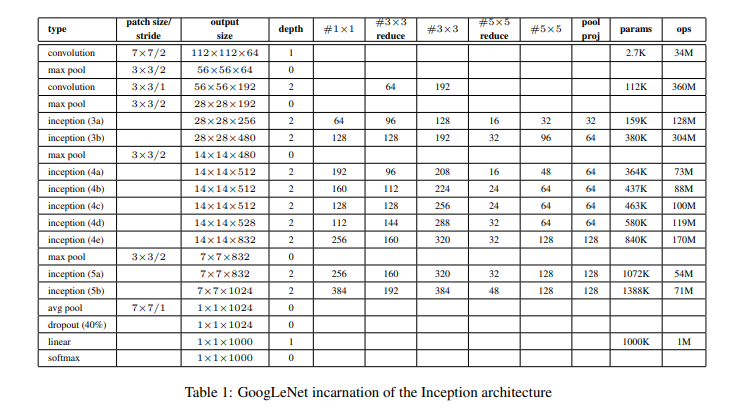

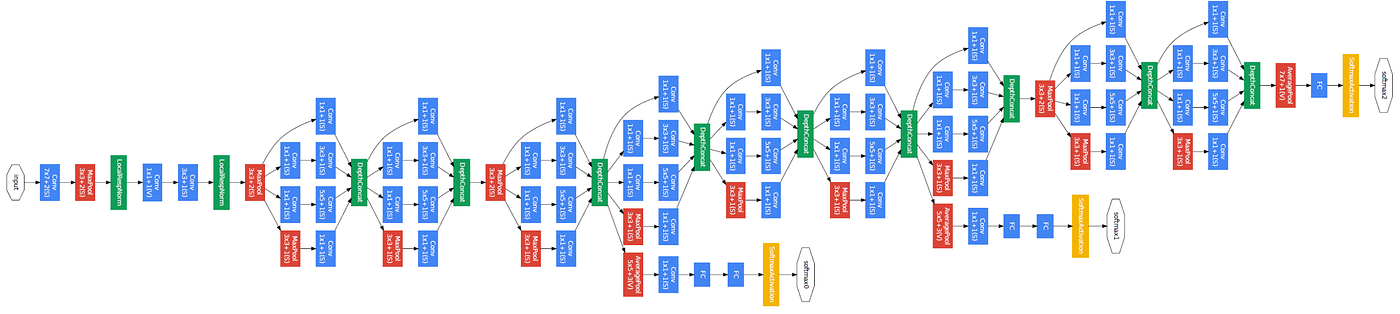

In [8]:
def inception_block(inputs, one_by_one_filters, three_by_three_red_filters, three_by_three_filters, five_by_five_red_filters, five_by_five_filters):
  one_by_one = tf.keras.layers.Conv2D(filters=one_by_one_filters,
                                      padding='same',
                                      kernel_size=(1, 1),
                                      strides=1, kernel_initializer='he_normal')(inputs)
  one_by_one = tf.keras.layers.BatchNormalization()(one_by_one)
  one_by_one = tf.keras.layers.Activation('relu')(one_by_one)

  three_by_three = tf.keras.layers.Conv2D(filters=three_by_three_red_filters,
                                      padding='same',
                                      kernel_size=(1, 1),
                                      strides=1, kernel_initializer='he_normal')(inputs)
  three_by_three = tf.keras.layers.BatchNormalization()(three_by_three)
  three_by_three = tf.keras.layers.Activation('relu')(three_by_three)
  three_by_three = tf.keras.layers.Conv2D(filters=three_by_three_filters,
                                      padding='same',
                                      kernel_size=(3, 3),
                                      strides=1, kernel_initializer='he_normal')(three_by_three)
  three_by_three = tf.keras.layers.BatchNormalization()(three_by_three)
  three_by_three = tf.keras.layers.Activation('relu')(three_by_three)

  five_by_five = tf.keras.layers.Conv2D(filters=five_by_five_red_filters,
                                      padding='same',
                                      kernel_size=(1, 1),
                                      strides=1, kernel_initializer='he_normal')(inputs)
  five_by_five = tf.keras.layers.BatchNormalization()(five_by_five)
  five_by_five = tf.keras.layers.Activation('relu')(five_by_five)
  five_by_five = tf.keras.layers.Conv2D(filters=five_by_five_filters,
                                      padding='same',
                                      kernel_size=(5, 5),
                                      strides=1, kernel_initializer='he_normal')(five_by_five)
  five_by_five = tf.keras.layers.BatchNormalization()(five_by_five)
  five_by_five = tf.keras.layers.Activation('relu')(five_by_five)

  max_pool = tf.keras.layers.MaxPooling2D(3, padding='same', strides=1)(inputs)
  max_pool = tf.keras.layers.Conv2D(filters=one_by_one_filters,
                                      padding='same',
                                      kernel_size=(1, 1),
                                      strides=1, kernel_initializer='he_normal')(max_pool)
  max_pool = tf.keras.layers.BatchNormalization()(max_pool)
  max_pool = tf.keras.layers.Activation('relu')(max_pool)

  concat = tf.keras.layers.Concatenate()([one_by_one, three_by_three, five_by_five, max_pool])

  return concat

In [9]:
def aux_out(inputs, filter, n_classes):
  x = tf.keras.layers.AveragePooling2D(pool_size=(5,5), strides=3, padding='same')(inputs)
  x = tf.keras.layers.Conv2D(filter, (1, 1), activation='relu', kernel_initializer='he_normal', strides =1, padding='same')(x)
  x = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal')(x)
  out = tf.keras.layers.Dense(n_classes, activation='softmax')(x)
  return out

In [10]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(64, (7, 7), activation='relu', kernel_initializer='he_normal', strides =2, padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_normal', strides =2, padding='valid')(x)
x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', kernel_initializer='he_normal', strides =2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)
x = inception_block(x, 64, 96, 128, 16, 32)  # 1
x = inception_block(x, 128, 128, 192, 32, 96)  # 2
x = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)
x_first_branch = inception_block(x, 192, 96, 208, 16, 48)  # 3
x = inception_block(x_first_branch, 160, 112, 224, 24, 64)  # 1
x = inception_block(x, 128, 128, 256, 24, 64)  # 2
x_second_branch = inception_block(x, 112, 144, 288, 32, 64)  # 3
x = inception_block(x_second_branch, 256, 160, 320, 32, 128)  # 3
x = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)
x = inception_block(x, 256, 160, 320, 32, 128)  # 3
x = inception_block(x, 384, 192, 384, 48, 128)  # 3
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7), strides=1, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.4)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
aux_out1 = aux_out(x_first_branch, 64, 10)
aux_out2 = aux_out(x_second_branch, 64, 10)

In [11]:
inception = tf.keras.Model(inputs=[inputs], outputs=[outputs, aux_out1, aux_out2])

In [12]:
inception.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ conv2d_36[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 28, 28,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 14, 14,    │    110,784 │ conv2d_37[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        768 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 7, 7, 192) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 7, 7, 96)  │     18,528 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 7, 7, 16)  │      3,088 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 96)  │        384 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 16)  │         64 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 7, 7, 96)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_35       │ (None, 7, 7, 16)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 192) │          0 │ max_pooling2d_2[… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 7, 7, 64)  │     12,352 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 7, 7, 128) │    110,720 │ activation_33[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 7, 7, 32)  │     12,832 │ activation_35[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,144,574 (27.25 MB)

 Trainable params: 7,128,254 (27.19 MB)

 Non-trainable params: 16,320 (63.75 KB)

In [ ]:
tf.keras.utils.plot_model(inception, show_shapes=True)